#  Logistic Regression.2

In [76]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
# Importing the dataset
df = pd.read_csv('happiness.csv',sep=';')
df = df.drop(['Overall_rank'], axis='columns', inplace=False)
df

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Fr_to_make_choices,Generosity,Perceptions_of_corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393000
1,7.600,1.383,1.573,0.996,0.592,0.252,0.394216
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341000
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118000
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298000
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.394216
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147000
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025000
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035000


In [78]:
df["happiness"] =  np.where(df['Score'] <= 5.8, 0, 1)

In [79]:
df = df.drop(['Score'], axis='columns', inplace=False)

<AxesSubplot:ylabel='Frequency'>

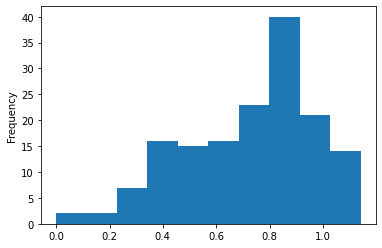

In [80]:
# Feature distribution
df['Healthy_life_expectancy'].plot(kind = 'hist')

In [81]:
df["Healthy_life"] =  np.where(df['Healthy_life_expectancy'] <= 0.6, 0, 1)
df

,GDP_per_capita,Social_support,Healthy_life_expectancy,Fr_to_make_choices,Generosity,Perceptions_of_corruption,happiness,Healthy_life
0,1.340,1.587,0.986,0.596,0.153,0.393000,1,1
1,1.383,1.573,0.996,0.592,0.252,0.394216,1,1
2,1.488,1.582,1.028,0.603,0.271,0.341000,1,1
3,1.380,1.624,1.026,0.591,0.354,0.118000,1,1
4,1.396,1.522,0.999,0.557,0.322,0.298000,1,1
...,...,...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.394216,0,1
152,0.476,0.885,0.499,0.417,0.276,0.147000,0,0
153,0.350,0.517,0.361,0.000,0.158,0.025000,0,0
154,0.026,0.000,0.105,0.225,0.235,0.035000,0,0


In [82]:
df = df.drop(['happiness'], axis='columns', inplace=False)

In [83]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:,:-1]
y = df['Healthy_life']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [85]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.174341
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.717     
Dependent Variable: Healthy_life     AIC:              55.2367   
Date:               2021-11-02 15:30 BIC:              72.1584   
No. Observations:   124              Log-Likelihood:   -21.618   
Df Model:           5                LL-Null:          -76.413   
Df Residuals:       118              LLR p-value:      5.0047e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -1.1965      0.9063    -1.3202    0.1868    -2.9729    0.5798
x2      1.3268      0.7508     1.7671    0.0772    -0.

In [86]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=12)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[False False  True False False False]
[2 3 1 5 6 4]


In [87]:
X_train = X_train[:,[2,3]]
X_test = X_test[:,[2,3]]

In [88]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [89]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

1.0

In [90]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9  0]
 [ 0 23]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


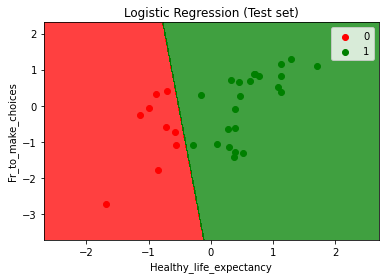

In [91]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Healthy_life_expectancy')
plt.ylabel('Fr_to_make_choices')
plt.legend()
plt.show()